**Listing 6.22 Preparing the IMDB data**

In [1]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


**Listing 6.23 Training the model with Embedding and SimpleRNN layers**

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 48s 285ms/step - loss: 0.5716 - acc: 0.6909 - val_loss: 0.4136 - val_acc: 0.8192
Epoch 2/10
157/157 [==============================] - 47s 301ms/step - loss: 0.3704 - acc: 0.8441 - val_loss: 0.3994 - val_acc: 0.8294
Epoch 3/10
157/157 [==============================] - 41s 262ms/step - loss: 0.2979 - acc: 0.8821 - val_loss: 0.3905 - val_acc: 0.8280
Epoch 4/10
157/157 [==============================] - 34s 215ms/step - loss: 0.2686 - acc: 0.8935 - val_loss: 0.3911 - val_acc: 0.8406
Epoch 5/10
157/157 [==============================] - 34s 219ms/step - loss: 0.2289 - acc: 0.9117 - val_loss: 0.4203 - val_acc: 0.8090
Epoch 6/10
157/157 [==============================] - 42s 263ms/step - loss: 0.2062 - acc: 0.9208 - val_loss: 0.3785 - val_acc: 0.8416
Epoch 7/10
157/157 [==============================] - 31s 194ms/step - loss: 0.1715 - acc: 0.9380 - val_loss: 0.3783 - val_acc: 0.8590
Epoch 8/10
157/157 [==============================] - 3

**Listing 6.24 Plotting results**

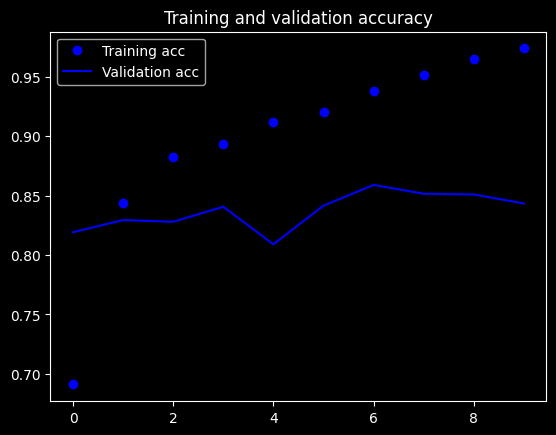

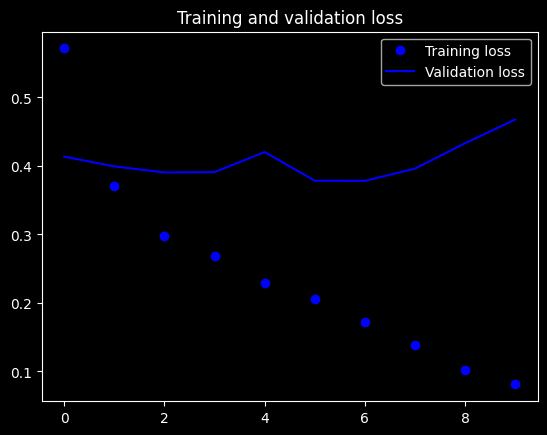

In [3]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Listing 6.25 Pseudocode details of the LSTM architecture (1/2)**

In [6]:
y = activation(dot(state_t, U) + dot(input_t, W) + b)

output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

NameError: name 'activation' is not defined

**6.2.2 Understanding the LSTM and GRU layers**

**Listing 6.27 Using the LSTM layer in Keras**

In [11]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 123s 735ms/step - loss: 0.6057 - acc: 0.6727 - val_loss: 0.4906 - val_acc: 0.7630
Epoch 2/10
157/157 [==============================] - 115s 732ms/step - loss: 0.3592 - acc: 0.8518 - val_loss: 0.4150 - val_acc: 0.8268
Epoch 3/10
157/157 [==============================] - 122s 778ms/step - loss: 0.2700 - acc: 0.8953 - val_loss: 0.3654 - val_acc: 0.8578
Epoch 4/10
157/157 [==============================] - 146s 932ms/step - loss: 0.2288 - acc: 0.9140 - val_loss: 0.2833 - val_acc: 0.8812
Epoch 5/10
157/157 [==============================] - 167s 1s/step - loss: 0.1958 - acc: 0.9279 - val_loss: 0.2836 - val_acc: 0.8830
Epoch 6/10
157/157 [==============================] - 154s 980ms/step - loss: 0.1763 - acc: 0.9371 - val_loss: 0.4582 - val_acc: 0.8204
Epoch 7/10
157/157 [==============================] - 109s 693ms/step - loss: 0.1559 - acc: 0.9466 - val_loss: 0.3377 - val_acc: 0.8802
Epoch 8/10
157/157 [==============================]

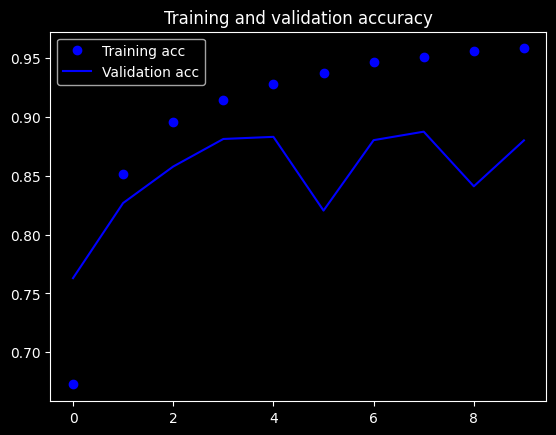

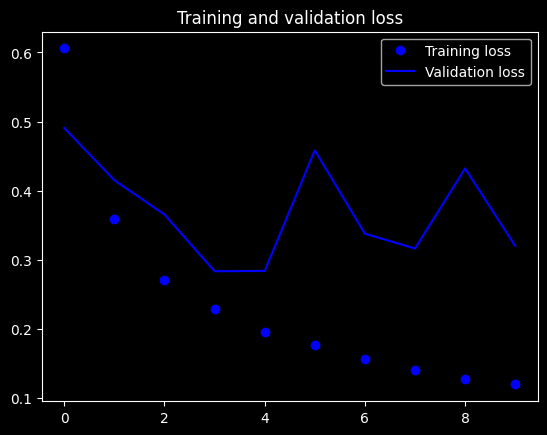

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()